# **Fire Detection on images using Convolutional Neural Networks (CNN)**
Author: Gregorio Mendoza Serrano
---


In this project we implement a Deep Neural Network (DNN) for image classification using an object recognition dataset. The goal is to design, train, and evaluate the neural network using deep learning techniques such as architecture selection, hyperparameter optimization, and result visualization.

### Key Steps:
1. **Data Preparation:** Load and preprocess the dataset.
2. **Architecture Design:** Select an appropriate deep neural network architecture.
3. **Model Training:** Train the neural network using the training data.
4. **Model Evaluation:** Evaluate the model's performance on the test set.
5. **Result Visualization:** Visualize examples of images and the predictions made by the neural network.

---

## Objective

During this exercise, we will train several convolutional neural networks (CNNs) for fire/flame detection in images, focusing on classification (Fire/No Fire). We will use a dataset of 10,000 images, half of which contain fire, while the other half do not.

As we develop the classification using CNNs, three different architectures will be explored (details provided throughout the notebook).

The **final goal** of the exercise is to provide:
- A **comparison of confusion matrices** for the models and the associated metrics.
- **Prediction examples** of images using the best-performing model.

---

## 1. Data Preparation: Loading and Preprocessing the Dataset

First, we download the dataset, which is contained in the compressed file `Fire-Detection.zip`. We will use the `gdown` command to download it from a public Google Drive link (personal folder).

The dataset contains 10,000 JPG images, half of which include fire in some form, while the other half do not.

In [ ]:
!gdown 1kbyDYGUhuOjEXMVe7S8gtxslIGcJLOGY

Downloading...
From (original): https://drive.google.com/uc?id=1kbyDYGUhuOjEXMVe7S8gtxslIGcJLOGY
From (redirected): https://drive.google.com/uc?id=1kbyDYGUhuOjEXMVe7S8gtxslIGcJLOGY&confirm=t&uuid=9d7af152-23aa-4482-89c0-7f65d50bec1b
To: /content/Fire-Detection.zip
100% 101M/101M [00:01<00:00, 81.5MB/s] 


We extract the downloaded .zip file in the directory of this Colab Notebook. 

In [ ]:
import zipfile

# Unzip the archive
local_zip = './Fire-Detection.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

The content of the .zip file is extracted into the base directory `./Fire-Detection`, which contains subdirectories for training, testing, and validation with the corresponding images. These folders also contain two subfolders, `Fire` and `Non-Fire`, which hold the images for each class.

The <font color='IndianRed'>**training set**</font> (`train`) is the dataset we use to teach the neural network model what a fire looks like and when there isn’t one.

The <font color='IndianRed'>**validation set**</font> (`validation`) consists of images of fires and non-fires that the neural network will not see during training. We will use it to evaluate performance in determining whether an image contains fire or not.

The <font color='IndianRed'>**test set**</font> (`test`) will be used to finally test the algorithm's performance on unseen images. The accuracy on testing and the confusion matrix derived from that prediction will be the final objective of this exercise.

We will create a directory listing as a means of verification:

In [ ]:
import os

base_dir = 'Fire-Detection'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/Train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/Validation'))

print("\nContents of test directory:")
print(os.listdir(f'{base_dir}/Test'))

Contents of base directory:
['Validation', 'Test', 'Train']

Contents of train directory:
['Fire', 'Non-Fire']

Contents of validation directory:
['Fire', 'Non-Fire']

Contents of test directory:
['Fire', 'Non-Fire']


We will define the file paths for the dataset in the following variables. 

In [ ]:
import os

train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validation')
test_dir = os.path.join(base_dir, 'Test')

# Directory with training fire/non_fire pictures
train_fire_dir = os.path.join(train_dir, 'Fire')
train_nonfire_dir = os.path.join(train_dir, 'Non-Fire')

# Directory with validation fire/non_fire pictures
validation_fire_dir = os.path.join(validation_dir, 'Fire')
validation_nonfire_dir = os.path.join(validation_dir, 'Non-Fire')

# Directory with test fire/non_fire pictures
test_fire_dir = os.path.join(test_dir, 'Fire')
test_nonfire_dir = os.path.join(test_dir, 'Non-Fire')

 Next, we will check the file names of the images in the `fires` and `non_fires` subdirectories of the `train`, `validation`, and `test` directories.



In [ ]:
train_fire_fnames = os.listdir( train_fire_dir )
train_nonfire_fnames = os.listdir( train_nonfire_dir )

print("Train - Sample files:")
print(train_fire_fnames[:5])
print(train_nonfire_fnames[:5])
print("\n")

test_fire_fnames = os.listdir( test_fire_dir )
test_nonfire_fnames = os.listdir( test_nonfire_dir )

print("Test - Sample files:")
print(test_fire_fnames[:5])
print(test_nonfire_fnames[:5])
print("\n")

validation_fire_fnames = os.listdir( validation_fire_dir )
validation_nonfire_fnames = os.listdir( validation_nonfire_dir )

print("Validation - Sample files:")
print(validation_fire_fnames[:5])
print(validation_nonfire_fnames[:5])

Train - Sample files:
['firenight756.jpg', 'fireday296.jpg', 'SynNig590.jpg', 'dayroad444.jpg', 'fireday446.jpg']
['cats361.jpg', 'clouds23.jpg', 'sunset1165.jpg', 'sunset576.jpg', 'day34.jpg']


Test - Sample files:
['SynNig173.jpg', 'SynDay235.jpg', 'dayroad122.jpg', 'SynDay305.jpg', 'SynNig103.jpg']
['clouds301.jpg', 'sunset251.jpg', 'sunset176.jpg', 'road_day134.jpg', 'sunset20.jpg']


Validation - Sample files:
['SynDay1196.jpg', 'SynDay1119.jpg', 'nightroad12.jpg', 'SynDay1137.jpg', 'SynDay863.jpg']
['sunset739.jpg', 'road_day319.jpg', 'sunset656.jpg', 'crash138.jpg', 'road_night227.jpg']


We will display the number of images available for training, testing, and validation.


In [ ]:
print('total training fire images :', len(os.listdir(train_fire_dir ) ))
print('total training non_fire images :', len(os.listdir(train_nonfire_dir ) ))

print('total validation fire images :', len(os.listdir(validation_fire_dir ) ))
print('total validation non_fire images :', len(os.listdir(validation_nonfire_dir ) ))

print('total test fire images :', len(os.listdir(test_fire_dir ) ))
print('total test non_fire images :', len(os.listdir(test_nonfire_dir ) ))

total training fire images : 3003
total training non_fire images : 3000
total validation fire images : 1000
total validation non_fire images : 1000
total test fire images : 1000
total test non_fire images : 1000



Now, we will perform a visual check of what some example images from the dataset look like. First, we will configure the parameters for the `matplotlib` library:


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images


We will then display 8 random images from the dataset corresponding to the `Fire` class and another 8 images corresponding to the `Non-Fire` class:


Imágenes con fuego ('Fire')


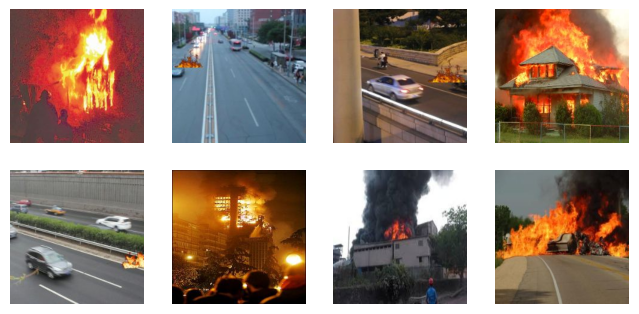


Imágenes sin fuego ('Non-Fire')


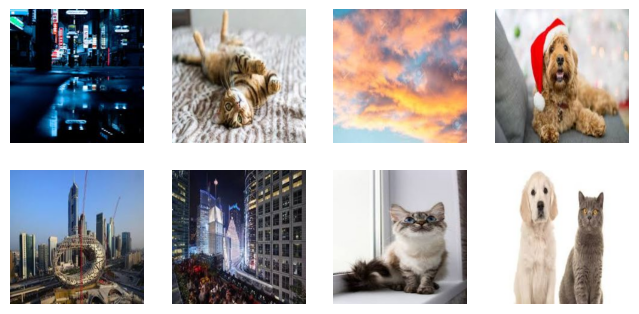

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*2, nrows*2)

pic_index+=8

next_fire_pix = [os.path.join(train_fire_dir, fname)
                for fname in train_fire_fnames[ pic_index-8:pic_index]
               ]

next_nonfire_pix = [os.path.join(train_nonfire_dir, fname)
                for fname in train_nonfire_fnames[ pic_index-8:pic_index]
               ]

print("\nImágenes con fuego ('Fire')")
for i, img_path in enumerate(next_fire_pix):
  # Set up subplot; subplot indices start at 1
  sp1 = plt.subplot(nrows, ncols, i + 1)
  sp1.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

fig = plt.gcf()
fig.set_size_inches(ncols*2, nrows*2)

print("\nImágenes sin fuego ('Non-Fire')")
for i, img_path in enumerate(next_nonfire_pix):
  # Set up subplot; subplot indices start at 1
  sp2 = plt.subplot(nrows, ncols, i + 1)
  sp2.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


The images in the dataset appear to be diverse and representative of real cases, as they contain many types of fire and flames. In the case of non-fire images, the appearance is quite heterogeneous, covering buildings, animals, nature, etc., even including sunsets and direct photos of the sun. This diversity aids in training by teaching the algorithm not to confuse the sun or a red sky with flames.

We will import the necessary libraries and define the training, validation, and test sets using TensorFlow's `ImageDataGenerator`.


In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



Note that from the very beginning, we will use *Data Augmentation* to reduce overfitting on the training images in our dataset:
  - `horizontal_flip=True` is used to take advantage of the anti-symmetrical nature of flames, which are assumed to always be vertical.
  - `fill_mode='nearest'` will fill in the remaining pixels of the image when converting it to square using the nearest pixel value.

We will use a batch size of 30 images, with a target size of 150x150 pixels.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator(
      rescale=1./255.,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 30 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=30,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
# --------------------
# Flow validation images in batches of 30 using test_datagen generator
# --------------------
validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                               batch_size=30,
                                                               class_mode  = 'binary',
                                                               target_size = (150, 150))
# --------------------
# Flow training images in batches of 30 using train_datagen generator
# --------------------
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  class_mode='binary',
                                                  target_size=(150, 150),
                                                  shuffle = False)


Found 6003 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


---

## 2. Architecture Design: Selecting an Appropriate Deep Neural Network Architecture

When developing the classification using CNNs, we will study three different architectures:

1. <font color='sky blue'>**Model 1:**</font> A simple CNN with 3 convolutional layers [sequences of 16, 32, and 64 filters], MaxPooling, and DropOut layers (25%) interspersed between the convolutional layers, along with a dense layer of 256 neurons followed by a 50% DropOut.

2. <font color='sky blue'>**Model 2:**</font> A slightly deeper CNN with 6 convolutional layers [sequences of 32, 64, 128, 256, 256, and 512 filters], MaxPooling, and DropOut layers (25%) interspersed between the convolutional layers, and two dense layers with 215 and 64 neurons, respectively, both with a 50% DropOut afterward.

3. <font color='sky blue'>**Model 3:**</font> A simplified Xception-type CNN, featuring 2 blocks of depthwise separable convolutions, iterated with a sequence of [32, 64, 128, 256] filters, which separates spatial and channel convolutions. This model is chosen for its effectiveness in detecting subtle details with complex boundaries in images (which is the case for fire).

We will import the necessary libraries:


In [ ]:
from tensorflow.keras import layers
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

We will now proceed to develop and compile the three models mentioned earlier:



### **Model 1:** Simple CNN (3 convolutional layers + 1 dense layer)

In [ ]:
def create_model_1():

  model = tf.keras.models.Sequential([
  # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),  # Adding dropout with a dropout rate of 0.25
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),  # Adding dropout with a dropout rate of 0.25
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Adding dropout with a dropout rate of 0.5
    # Output neuron:
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics = ['accuracy'])

  return model

# Creación del modelo 1 (tres capas):
Model_1 = create_model_1()


We will obtain a summary of the model for display:


In [ ]:
Model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 74, 74, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 74, 74, 16)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_32 (MaxPooli  (None, 36, 36, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 36, 36, 32)       


### **Model 2:** Deeper CNN (6 convolutional layers + 2 dense layers)


In [ ]:
def create_model_2():

  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.25),  # Adding dropout with a dropout rate of 0.25
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.25),  # Adding dropout with a dropout rate of 0.25
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.25),  # Adding dropout with a dropout rate of 0.25
      tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
      tf.keras.layers.Dropout(0.25),  # Adding dropout with a dropout rate of 0.25
      tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dropout(0.5),  # Adding dropout with a dropout rate of 0.5
      tf.keras.layers.Dense(64, activation='relu'),
      tf.keras.layers.Dropout(0.5),  # Adding dropout with a dropout rate of 0.5
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

# Creación del modelo 2 (seis capas):
Model_2 = create_model_2()



We will print a summary of the model and its parameters for display:

In [ ]:
Model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_13 (Dropout)        (None, 36, 36, 64)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 34, 34, 128)      


### **Model 3:** Simplified Xception Model


In [ ]:
inputs = keras.Input(shape=(150, 150, 3))

x = layers.Conv2D(filters=32, kernel_size=5, use_bias=False)(inputs)

for size in [32, 64, 128, 256]:
    residual = x

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)
    x = layers.SeparableConv2D(size, 3, padding="same", use_bias=False)(x)

    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

    residual = layers.Conv2D(
        size, 1, strides=2, padding="same", use_bias=False)(residual)
    x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

# Creación del modelo 3 (Xception simplificado):

Model_3 = keras.Model(inputs=inputs, outputs=outputs)

Model_3.compile(loss="binary_crossentropy",
                optimizer="rmsprop",
                metrics=["accuracy"])

We will print a summary of the model and its parameters for display:

In [ ]:
Model_3.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_35 (Conv2D)          (None, 146, 146, 32)         2400      ['input_5[0][0]']             
                                                                                                  
 batch_normalization_32 (Ba  (None, 146, 146, 32)         128       ['conv2d_35[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_32 (Activation)  (None, 146, 146, 32)         0         ['batch_normalization_32



---



## 3-4. Model Training and Evaluation on the Test Set

In this section, for convenience, we will combine the training and evaluation sections (Sections 3 and 4) of the exercise for the three algorithms.

First, we will allow the user of the notebook to choose:
- To **retrain the models or any of them**. To do this, modify the value of any of the three variables in the block below to `retrain_model = True`.
- To **run the notebook without retraining the models** (default value). In this case, the trained models will be imported in the next block through `*.keras` files.

In [ ]:
retrain_Model1 = False # Reentrenamiento del Modelo 1?
retrain_Model2 = False # Reentrenamiento del Modelo 2?
retrain_Model3 = False # Reentrenamiento del Modelo 3?

If any of the variables were set to `False` in the previous block, the corresponding pre-trained model(s) will be downloaded from Google Drive.


In [ ]:
if retrain_Model1==False:
  !gdown 1Qx7xxih8WMTiNzMpYqhuE8WvyNAk2nhO

if retrain_Model2==False:
  !gdown 1QtU33Sh0aj5GWl6zNOTvTUFx1hEbd-ND

if retrain_Model3==False:
  !gdown 1QTC44eehAiJfdQQVbhojMtimJVJRHJcN



Now, we will train using the 6,000 available images for 40 epochs, monitoring the accuracy on the 2,000 images in the validation set as well.

We will obtain 4 values per epoch: Loss, Accuracy, Validation Loss, and Validation Accuracy.

Loss and accuracy are important indicators of progress during training. Loss measures the model's current prediction against the known labels, calculating the outcome. Accuracy, on the other hand, is the proportion of correct predictions.

**Note:** To execute the training in the blocks below, `retrain_model` must be set to `True` in block [76].

Let's train **Model 1**:


In [ ]:
if retrain_Model1==True:

    callbacks_Model_1 = [
        keras.callbacks.ModelCheckpoint(
            filepath="Model_1.keras",
            save_best_only=True,
            monitor="val_loss")
    ]

    history =  Model_1.fit(
        train_generator,
        epochs=40,
        validation_data=validation_generator,
        callbacks=callbacks_Model_1)

Epoch 1/40
201/201 [==============================] - 11s 48ms/step - loss: 0.6620 - accuracy: 0.6039 - val_loss: 0.7291 - val_accuracy: 0.3880
Epoch 2/40
201/201 [==============================] - 10s 48ms/step - loss: 0.6032 - accuracy: 0.6605 - val_loss: 0.6993 - val_accuracy: 0.4530
Epoch 3/40
201/201 [==============================] - 9s 47ms/step - loss: 0.5576 - accuracy: 0.7080 - val_loss: 0.6225 - val_accuracy: 0.7015
Epoch 4/40
201/201 [==============================] - 10s 48ms/step - loss: 0.5003 - accuracy: 0.7606 - val_loss: 0.5488 - val_accuracy: 0.7745
Epoch 5/40
201/201 [==============================] - 9s 47ms/step - loss: 0.4628 - accuracy: 0.7904 - val_loss: 0.4742 - val_accuracy: 0.8205
Epoch 6/40
201/201 [==============================] - 10s 52ms/step - loss: 0.4331 - accuracy: 0.8063 - val_loss: 0.4459 - val_accuracy: 0.8250
Epoch 7/40
201/201 [==============================] - 10s 50ms/step - loss: 0.4090 - accuracy: 0.8208 - val_loss: 0.3946 - val_accuracy: 0

Let's now show the *accuracy* for every epoch:

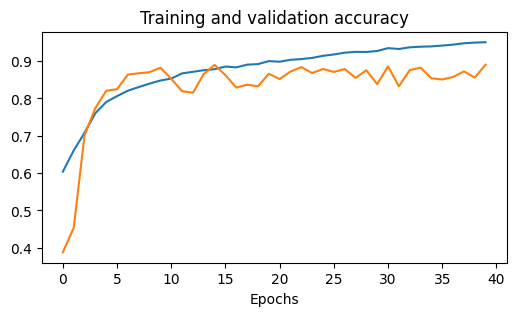

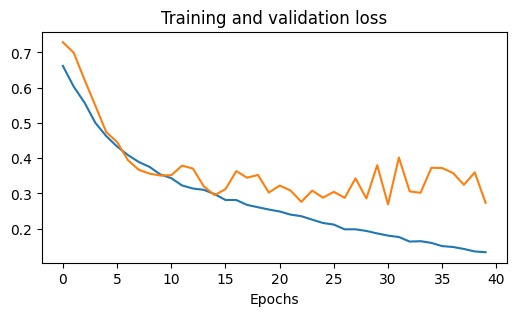

In [ ]:
if retrain_Model1 == True:
    #-----------------------------------------------------------
    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    acc      = history.history['accuracy']
    val_acc  = history.history['val_accuracy']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    epochs   = range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.figure(figsize=(6, 3))
    plt.plot  ( epochs, acc )
    plt.plot  ( epochs, val_acc )
    plt.title ('Training and validation accuracy')
    plt.xlabel('Epochs')
    print('\n')

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.figure(figsize=(6, 3))
    plt.plot  ( epochs, loss )
    plt.plot  ( epochs, val_loss )
    plt.title ('Training and validation loss'   )
    plt.xlabel('Epochs')

In both graphs, we see that the **Validation Accuracy** has plateaued, indicating that we have reached the maximum performance level that the neural network can achieve. 

In [ ]:
test_model_1 = keras.models.load_model("Model_1.keras")
test_loss_1, test_acc_1 = test_model_1.evaluate(test_generator)
print(f"Test accuracy: {test_acc_1:.3f}")

63/63 [==============================] - 2s 30ms/step - loss: 0.2763 - accuracy: 0.8890
Test accuracy: 0.889


The test accuracy obtained is approximately 89%.

In [ ]:
if retrain_Model2==True:

    callbacks_Model_2 = [
        keras.callbacks.ModelCheckpoint(
            filepath="Model_2.keras",
            save_best_only=True,
            monitor="val_loss")
    ]

    history =  Model_2.fit(
        train_generator,
        epochs=40,
        validation_data=validation_generator,
        callbacks=callbacks_Model_2)

Epoch 1/40
201/201 [==============================] - 13s 54ms/step - loss: 0.6534 - accuracy: 0.6147 - val_loss: 0.7456 - val_accuracy: 0.3995
Epoch 2/40
201/201 [==============================] - 11s 54ms/step - loss: 0.5942 - accuracy: 0.6822 - val_loss: 0.6551 - val_accuracy: 0.5230
Epoch 3/40
201/201 [==============================] - 11s 53ms/step - loss: 0.5316 - accuracy: 0.7455 - val_loss: 0.5537 - val_accuracy: 0.7670
Epoch 4/40
201/201 [==============================] - 11s 52ms/step - loss: 0.4794 - accuracy: 0.7816 - val_loss: 0.4652 - val_accuracy: 0.7950
Epoch 5/40
201/201 [==============================] - 11s 53ms/step - loss: 0.4321 - accuracy: 0.8159 - val_loss: 0.4474 - val_accuracy: 0.7830
Epoch 6/40
201/201 [==============================] - 11s 53ms/step - loss: 0.3888 - accuracy: 0.8481 - val_loss: 0.3648 - val_accuracy: 0.8500
Epoch 7/40
201/201 [==============================] - 11s 53ms/step - loss: 0.3550 - accuracy: 0.8571 - val_loss: 0.3148 - val_accuracy:

We will plot the accuracy per epoch:

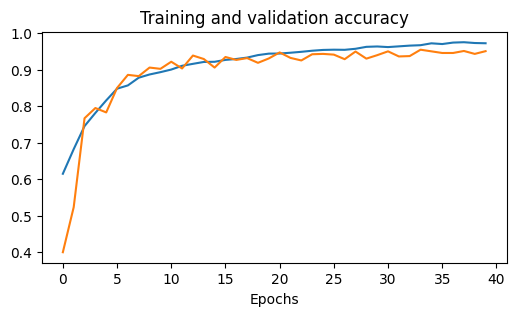

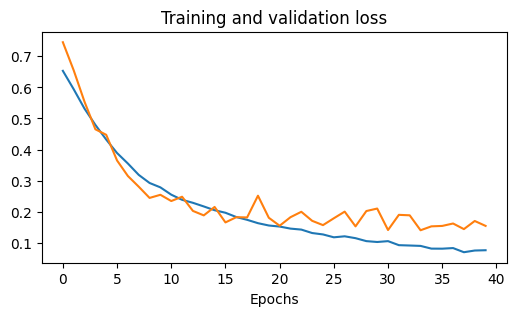

In [ ]:
if retrain_Model2 == True:
    #-----------------------------------------------------------
    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    acc      = history.history['accuracy']
    val_acc  = history.history['val_accuracy']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    epochs   = range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.figure(figsize=(6, 3))
    plt.plot  ( epochs, acc )
    plt.plot  ( epochs, val_acc )
    plt.title ('Training and validation accuracy')
    plt.xlabel('Epochs')
    print('\n')

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.figure(figsize=(6, 3))
    plt.plot  ( epochs, loss )
    plt.plot  ( epochs, val_loss )
    plt.title ('Training and validation loss'   )
    plt.xlabel('Epochs')

Similarly, we observe that the validation accuracy starts to change very slowly after about 15 epochs.

In [ ]:
test_model_2 = keras.models.load_model("Model_2.keras")
test_loss_2, test_acc_2 = test_model_2.evaluate(test_generator)
print(f"Test accuracy: {test_acc_2:.3f}")

63/63 [==============================] - 2s 32ms/step - loss: 0.2663 - accuracy: 0.9110
Test accuracy: 0.911


In this case, as expected, the validation accuracy rises to around 91%.



In [ ]:
if retrain_Model3==True:

    callbacks_Model_3 = [
        keras.callbacks.ModelCheckpoint(
            filepath="Model_3.keras",
            save_best_only=True,
            monitor="val_loss")
    ]

    history =  Model_3.fit(
        train_generator,
        epochs=40,
        validation_data=validation_generator,
        callbacks=callbacks_Model_3)

Epoch 1/40
201/201 [==============================] - 21s 88ms/step - loss: 0.4790 - accuracy: 0.7703 - val_loss: 0.7019 - val_accuracy: 0.4815
Epoch 2/40
201/201 [==============================] - 17s 86ms/step - loss: 0.3301 - accuracy: 0.8669 - val_loss: 0.7490 - val_accuracy: 0.5005
Epoch 3/40
201/201 [==============================] - 18s 87ms/step - loss: 0.2718 - accuracy: 0.8986 - val_loss: 0.3136 - val_accuracy: 0.8775
Epoch 4/40
201/201 [==============================] - 17s 86ms/step - loss: 0.2386 - accuracy: 0.9127 - val_loss: 0.6679 - val_accuracy: 0.7465
Epoch 5/40
201/201 [==============================] - 18s 88ms/step - loss: 0.2150 - accuracy: 0.9162 - val_loss: 0.2116 - val_accuracy: 0.9265
Epoch 6/40
201/201 [==============================] - 17s 86ms/step - loss: 0.1975 - accuracy: 0.9292 - val_loss: 0.2994 - val_accuracy: 0.9270
Epoch 7/40
201/201 [==============================] - 18s 87ms/step - loss: 0.1941 - accuracy: 0.9305 - val_loss: 0.3671 - val_accuracy:

We will now plot the accuracy per epoch:


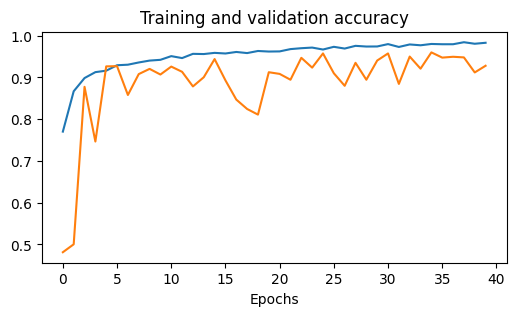

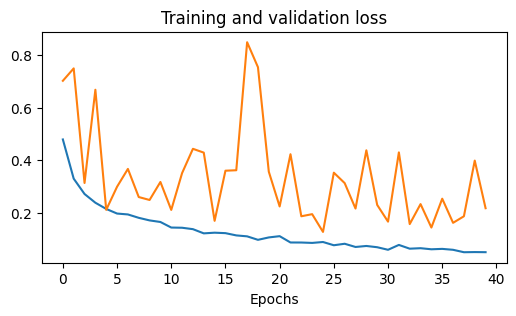

In [ ]:
if retrain_Model3 == True:
    #-----------------------------------------------------------
    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    acc      = history.history['accuracy']
    val_acc  = history.history['val_accuracy']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    epochs   = range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.figure(figsize=(6, 3))
    plt.plot  ( epochs, acc )
    plt.plot  ( epochs, val_acc )
    plt.title ('Training and validation accuracy')
    plt.xlabel('Epochs')
    print('\n')

    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.figure(figsize=(6, 3))
    plt.plot  ( epochs, loss )
    plt.plot  ( epochs, val_loss )
    plt.title ('Training and validation loss'   )
    plt.xlabel('Epochs')


As anticipated, there is a very slow evolution of the validation accuracy starting from approximately 15 epochs. However, perhaps with more epochs, the validation accuracy could be improved a bit more (for simplicity, it was kept at 40 epochs).

In [ ]:
test_model_3 = keras.models.load_model("Model_3.keras")
test_loss_3, test_acc_3 = test_model_3.evaluate(test_generator)
print(f"Test accuracy: {test_acc_3:.3f}")

63/63 [==============================] - 3s 33ms/step - loss: 0.1208 - accuracy: 0.9590
Test accuracy: 0.959



The test accuracy (96%) is now significantly higher than the previous two models. This indicates that, with a change in the algorithm's approach, we have reduced the relative error by more than 55%.

### Confusion Matrix and Associated Metrics

We will make predictions on the test set and make a small modification:

We will invert the model's labels to make them more intuitive for the upcoming test prediction analysis:

- **1** will become the classification label `'Fire'`
- **0** will become the classification label `'Non-Fire'`

In [ ]:
predictions_1 = test_model_1.predict(test_generator)
predictions_2 = test_model_2.predict(test_generator)
predictions_3 = test_model_3.predict(test_generator)

# Invertimos etiquetas de predicción:
binary_predictions_1 = (predictions_1 < 0.5).astype(int).flatten()
binary_predictions_2 = (predictions_2 < 0.5).astype(int).flatten()
binary_predictions_3 = (predictions_3 < 0.5).astype(int).flatten()

# Obtenemos las True Labels y las invertimos por consistencia:
true_labels = (test_generator.classes < 0.5).astype(int).flatten()

63/63 [==============================] - 2s 32ms/step


Next, we will calculate the confusion matrices for the three models and visualize them using Matplotlib. We will also display the results of the classification reports:

In [ ]:
# Calcula las matrices de confusión y los classification reports
cm1 = confusion_matrix(true_labels, binary_predictions_1)
cm2 = confusion_matrix(true_labels, binary_predictions_2)
cm3 = confusion_matrix(true_labels, binary_predictions_3)

cr1 = classification_report(true_labels, binary_predictions_1)
cr2 = classification_report(true_labels, binary_predictions_2)
cr3 = classification_report(true_labels, binary_predictions_3)

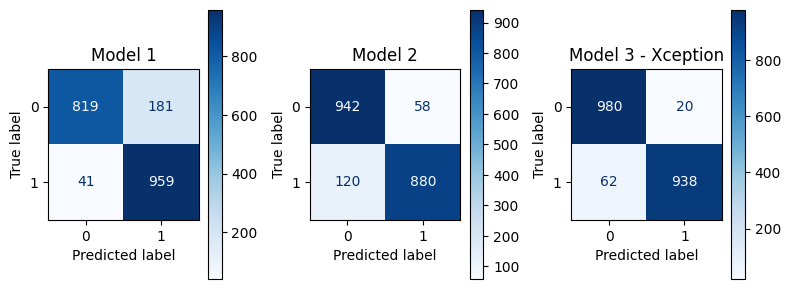




Classification Report del Modelo 1:

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      1000
           1       0.84      0.96      0.90      1000

    accuracy                           0.89      2000
   macro avg       0.90      0.89      0.89      2000
weighted avg       0.90      0.89      0.89      2000





Classification Report del Modelo 2:

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      1000
           1       0.94      0.88      0.91      1000

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000





Classification Report del Modelo 3:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1000
           1       0.98      0.94      0.96      1000

    accuracy                           0.96      2000
   mac

In [ ]:
# Crea el gráfico utilizando ConfusionMatrixDisplay y text boxes para classification reports
fig, axes = plt.subplots(1, 3, figsize=(8, 3))

# Display 1
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=[0, 1])
disp1.plot(ax=axes[0], cmap='Blues', values_format='d')
axes[0].set_title('Model 1')

# Display 2
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1])
disp2.plot(ax=axes[1], cmap='Blues', values_format='d')
axes[1].set_title('Model 2')

# Display 3
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=[0, 1])
disp3.plot(ax=axes[2], cmap='Blues', values_format='d')
axes[2].set_title('Model 3 - Xception')

plt.tight_layout()
plt.show()

print("\n")
print("")
report_1 = classification_report(true_labels, binary_predictions_1)
print("Classification Report del Modelo 1:")
print("")
print(report_1)
print("")

print("\n")
print("")
report_2 = classification_report(true_labels, binary_predictions_2)
print("Classification Report del Modelo 2:")
print("")
print(report_2)
print("")

print("\n")
print("")
report_3 = classification_report(true_labels, binary_predictions_3)
print("Classification Report del Modelo 3:")
print("")
print(report_3)
print("")

Based on the confusion matrices and their metrics, we can deduce the following:

- Considering the **Accuracy** value, **Model 3** (simplified Xception) would be the winner.
- In terms of **Recall**, the winning model is **Model 1**, as it has the lowest number of False Negatives (FN = 41), resulting in a Recall of 96%.
- In this application, it is crucial for Recall to be as high as possible, as in a surveillance system, a false alarm is preferable to not detecting a fire that could spread with catastrophic consequences.

Therefore, for practical reasons, contrary to initial expectations, we choose <font color='red'>**Model 1 as the winner**</font>.

---

**Additional Personal Notes:**

The only scenario in which the Precision metric would be more important than Recall in fire detection in images might be in military applications for damage detection/verification.

If a surveillance system mounted on a military aircraft (visual or close combat) mistakenly identifies an airborne or ground target as being on fire or damaged when it is not, this would constitute negligence that could lead to severe consequences.

If the algorithm from this exercise were intended for military use, **Model 3 would be the winner** due to its better Precision metric (98%).



---



## 5. Visualization of Results: Display Examples of Images and Predictions Made by the Neural Network

Next, we provide four external images (sourced from a personal Google Drive folder) to verify the predictions made by the chosen model from the previous section (**Model 1**, CNN with 3 convolutional layers + 1 dense layer).

For simplicity, the images have been named *Foto_1.jpg, Foto_2.jpg, Foto_3.jpg,* and *Foto_4.jpg*.


In [ ]:
!gdown 1QxHBUsJ7WtzKDfOVmiYt9fBGGELlKqoK
!gdown 1Rh8gpWpAMvhemQXqrNFpKF6jm-wHnhQq
!gdown 1RO-uPCkvzZA-xSrnyZEa0GzMlIbuSwdU
!gdown 1R9ysJP9t_bm30F_OnB6_8KNbsY8MPw3e

Downloading...
From: https://drive.google.com/uc?id=1QxHBUsJ7WtzKDfOVmiYt9fBGGELlKqoK
To: /content/Foto_1.jpg
100% 68.6k/68.6k [00:00<00:00, 92.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Rh8gpWpAMvhemQXqrNFpKF6jm-wHnhQq
To: /content/Foto_2.jpg
100% 87.6k/87.6k [00:00<00:00, 97.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RO-uPCkvzZA-xSrnyZEa0GzMlIbuSwdU
To: /content/Foto_3.jpg
100% 167k/167k [00:00<00:00, 107MB/s]
Downloading...
From: https://drive.google.com/uc?id=1R9ysJP9t_bm30F_OnB6_8KNbsY8MPw3e
To: /content/Foto_4.jpg
100% 940k/940k [00:00<00:00, 128MB/s]


Below, we will develop the code to display the four images consecutively along with the model's predictions:

1/1 [==============================] - 0s 19ms/step

Predicción de Foto 1:


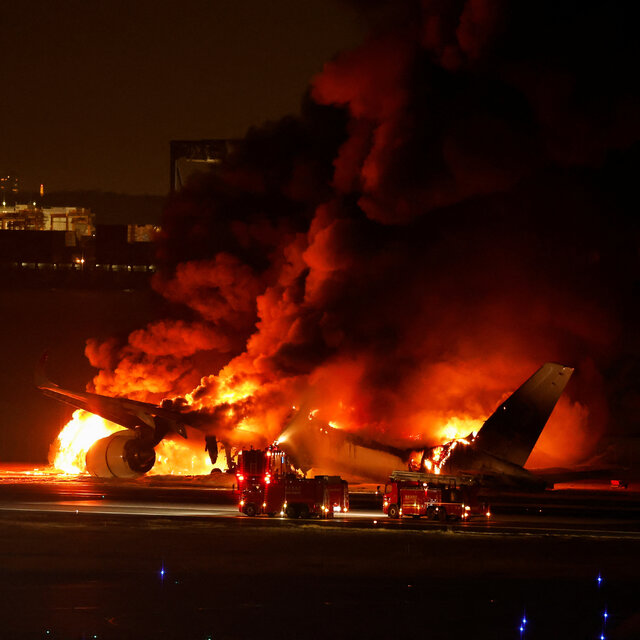

Contiene fuego!!

Predicción de Foto 2:


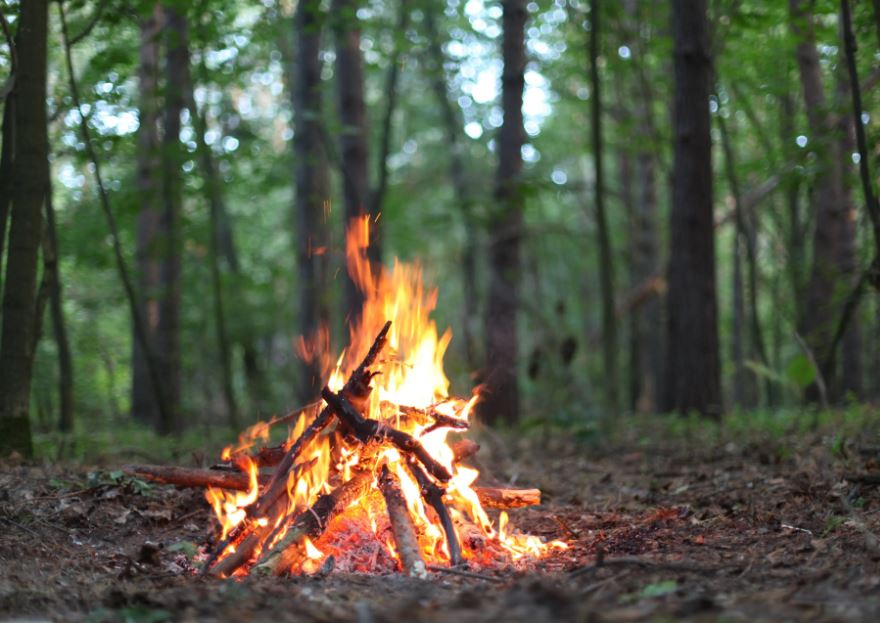

Contiene fuego!!

Predicción de Foto 3:


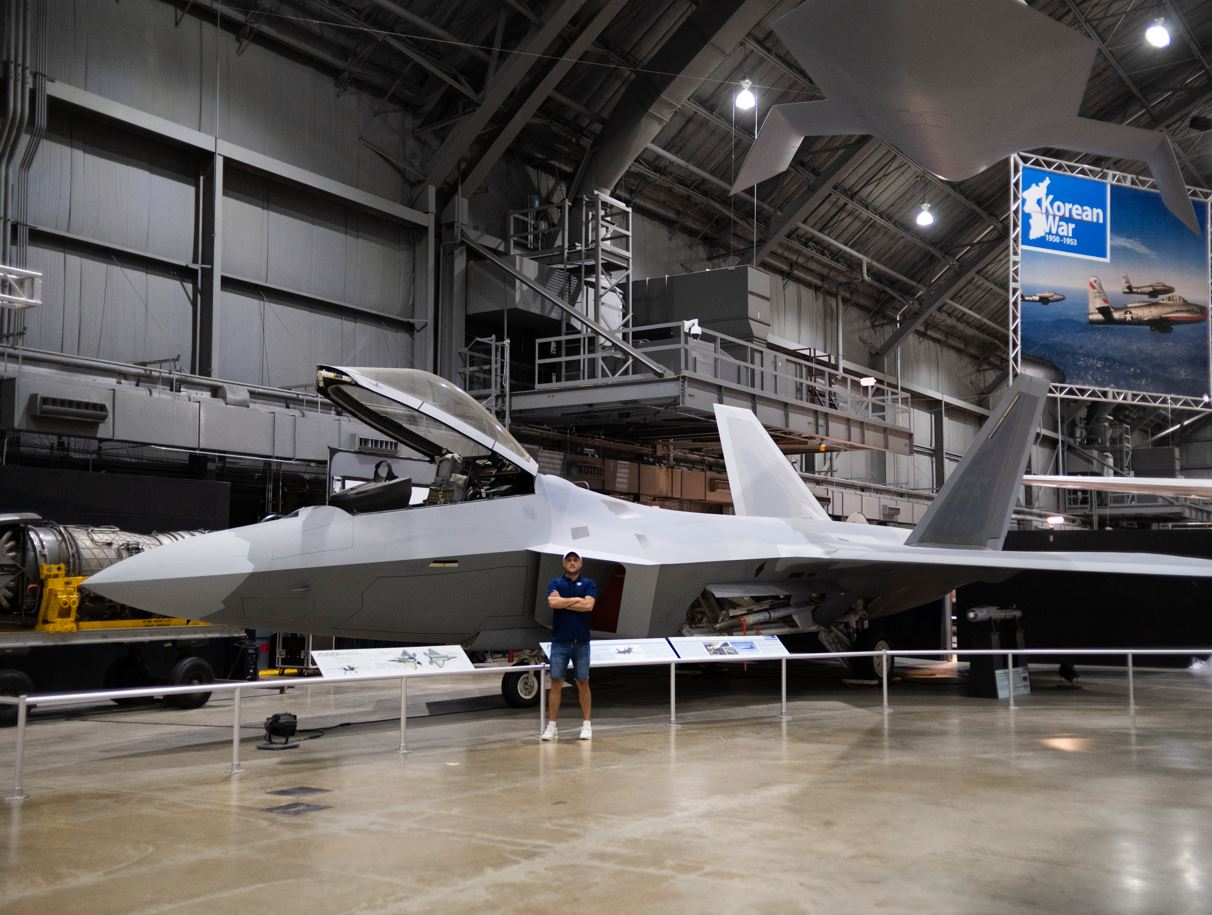

No contiene fuego

Predicción de Foto 4:


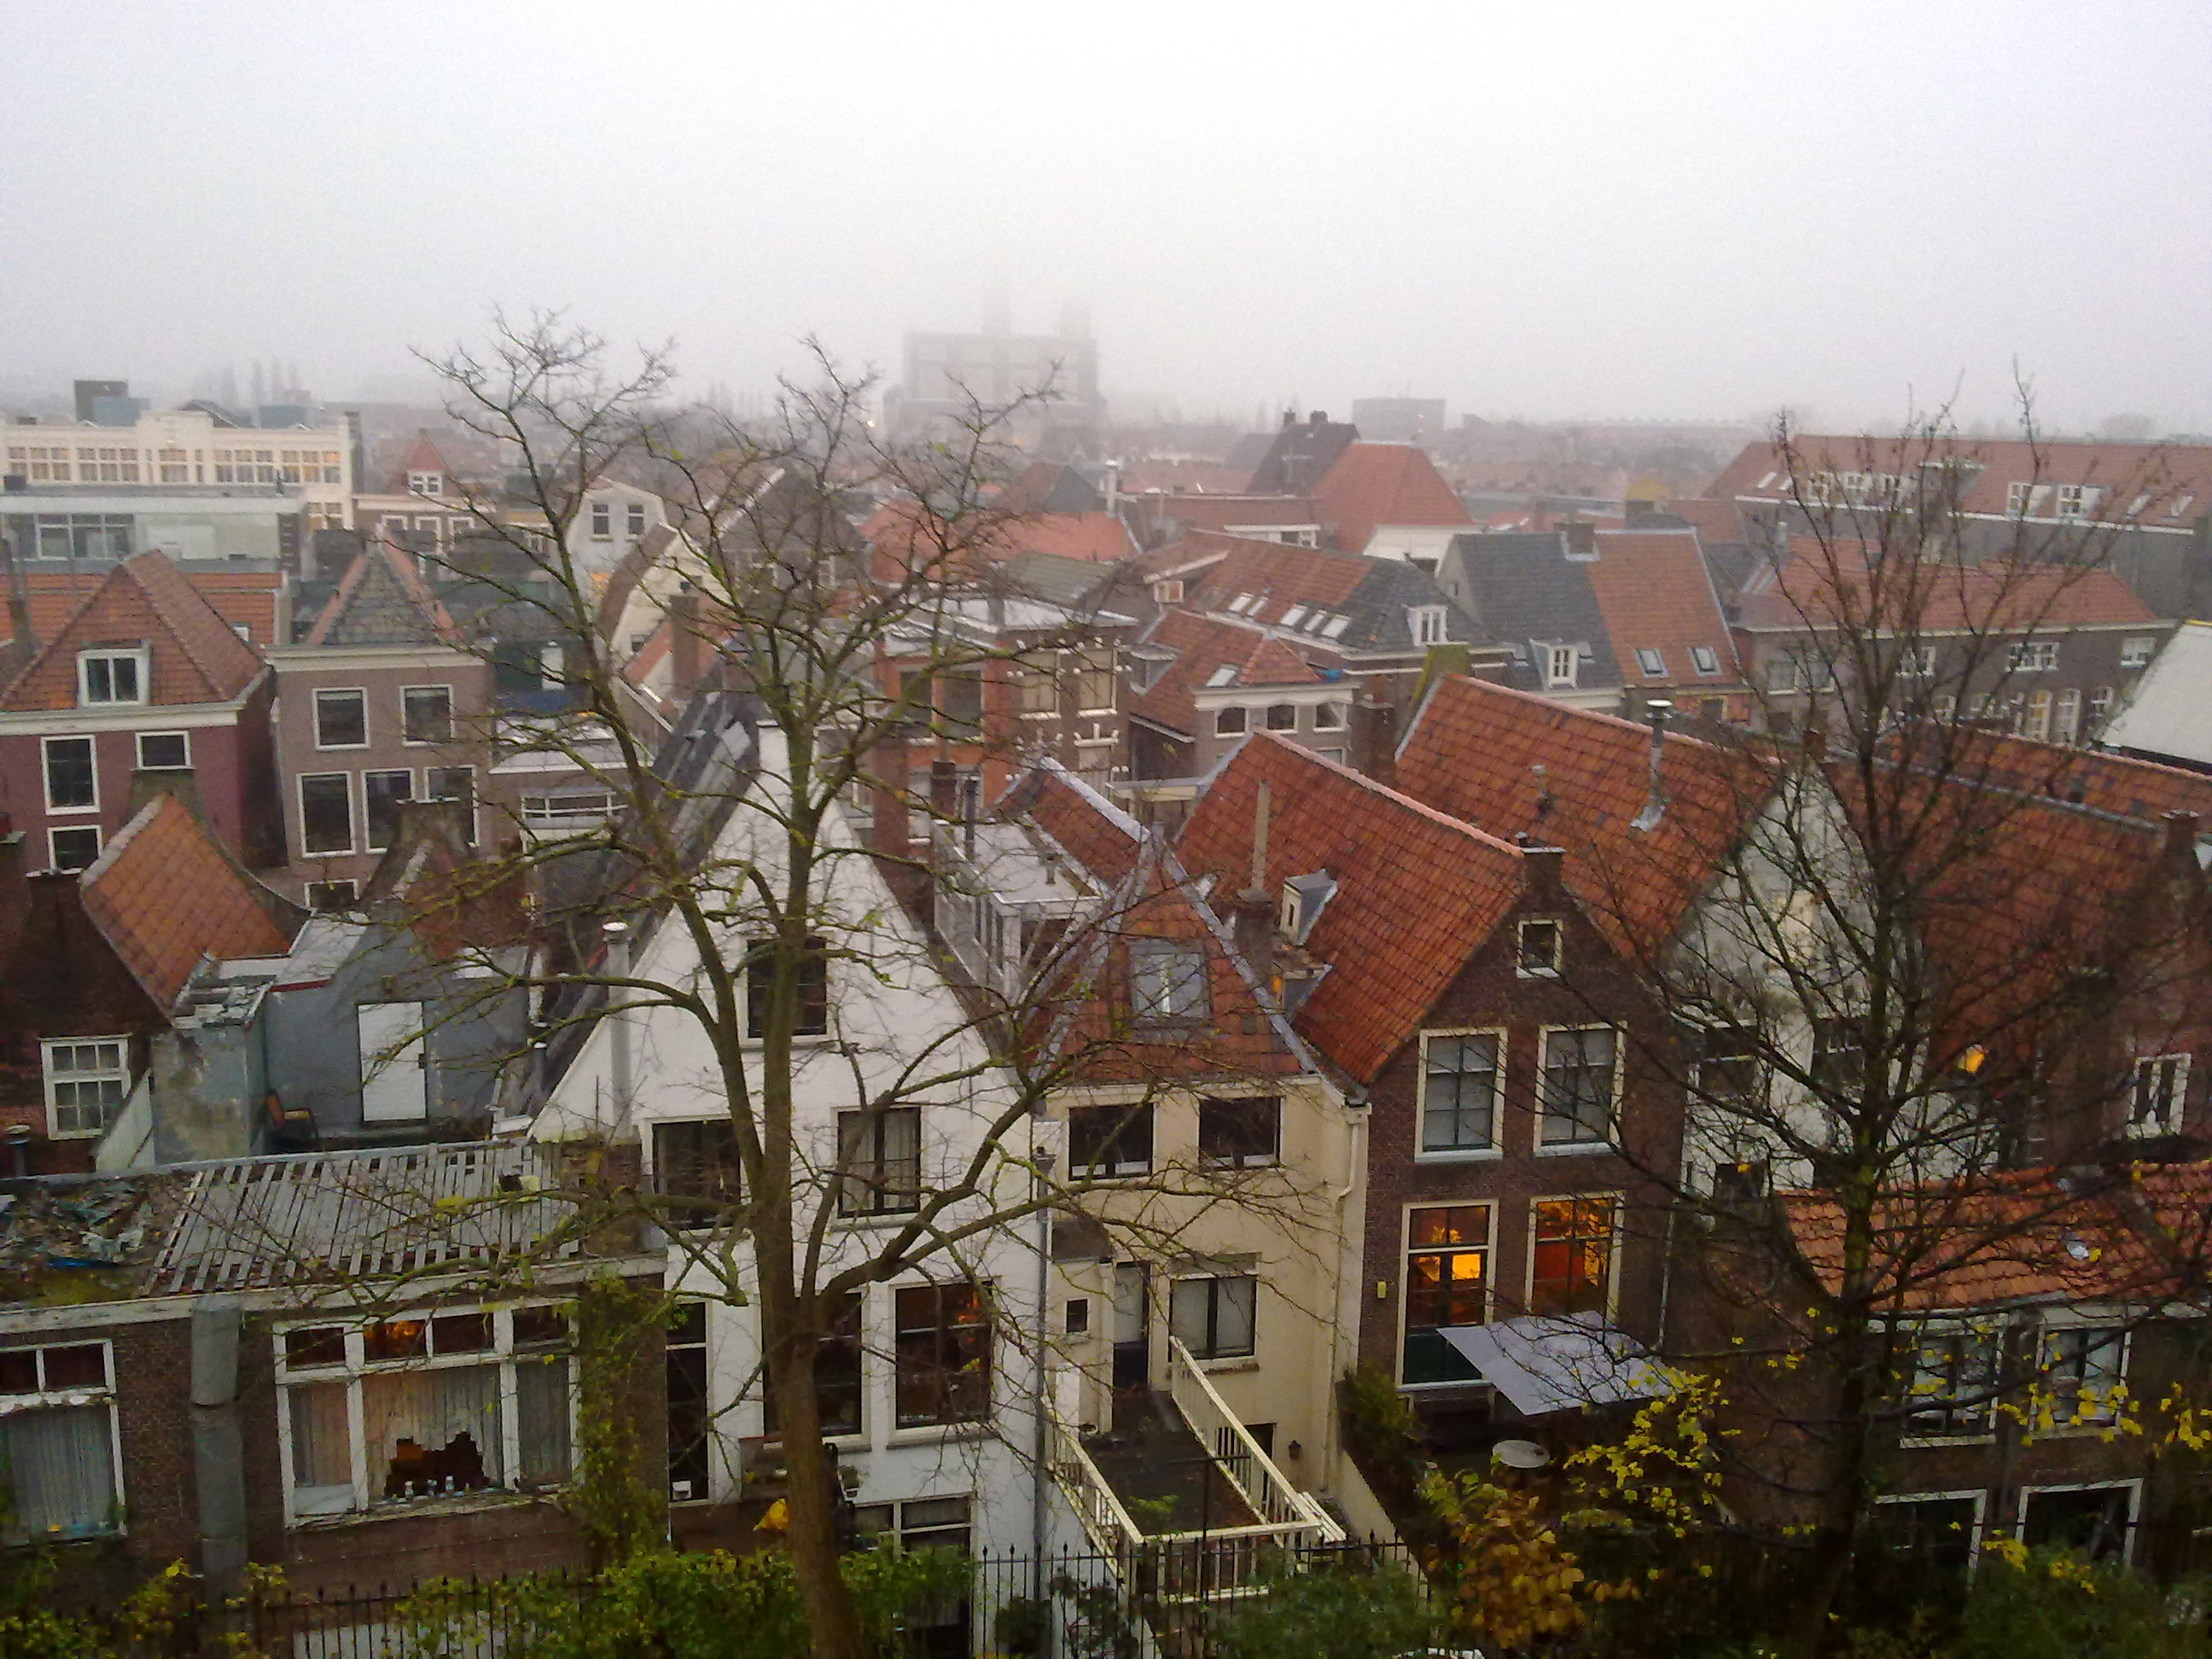

No contiene fuego


In [ ]:
import numpy as np
from IPython.display import Image, display

from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

def img_prediction(path):
  # predicting images
  img=load_img(path, target_size=(150, 150))

  x=img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = Model_1.predict(images, batch_size=10)

  return classes[0]

pred_Foto_1 = img_prediction('Foto_1.jpg')
pred_Foto_2 = img_prediction('Foto_2.jpg')
pred_Foto_3 = img_prediction('Foto_3.jpg')
pred_Foto_4 = img_prediction('Foto_4.jpg')

def show_image(image_path, width=None):
    display(Image(filename=image_path, width=width))

desired_width = 300

print("\nPredicción de Foto 1:")
show_image('Foto_1.jpg', desired_width)

if pred_Foto_1>0.5:
    print("No contiene fuego")
else:
  print("Contiene fuego!!")

print("\nPredicción de Foto 2:")
show_image('Foto_2.jpg', desired_width)

if pred_Foto_2>0.5:
    print("No contiene fuego")
else:
  print("Contiene fuego!!")

print("\nPredicción de Foto 3:")
show_image('Foto_3.jpg', desired_width)

if pred_Foto_3>0.5:
    print("No contiene fuego")
else:
  print("Contiene fuego!!")

print("\nPredicción de Foto 4:")
show_image('Foto_4.jpg', desired_width)

if pred_Foto_4>0.5:
    print("No contiene fuego")
else:
  print("Contiene fuego!!")

The model appears to perform accurately in the four cases provided.

It would be interesting to analyze in more detail the weaknesses of the algorithm by providing it with an even larger number of images. This way, we could include in the training images folder some photographs that resemble those that were misclassified, ultimately improving both the precision and recall. 

By systematically enhancing the dataset with challenging examples, we can refine the model’s ability to differentiate between fire and non-fire images, leading to a more robust and reliable classification system.



---

